# Aprendizaje Supervisado – **Regresión lineal para predecir Esperanza de Vida (WHO)**
**Autor:** Brandon Andrés Jiménez Nieto  

---

## Introducción
El dataset **Life Expectancy (WHO)** recopila datos de **193 países (2000–2015)** con factores de salud, economía y sociedad que influyen en la **esperanza de vida al nacer**.  

- **Filas:** 2938  
- **Columnas:** 22  
- **Variable objetivo:** `Life expectancy` (años)


### Variables principales:
- `Country`: país.  
- `Year`: año de la medición.  
- `Status`: *Developed* / *Developing*.  

**Variable objetivo:**
- `Life expectancy ` → **Esperanza de vida (años)**.  
  > Esta unidad (años) será usada al reportar **RMSE/MAE**.

**Mortalidad y salud:**
- `Adult Mortality` → probabilidad de morir entre 15–60 años (por cada 1000 hab., ambos sexos).  
- `infant deaths` → muertes en menores de 1 año (por cada 1000 hab.).  
- `under-five deaths` → muertes en menores de 5 años (por cada 1000 hab.).  
- `HIV/AIDS` → muertes por VIH en niños 0–4 años (por cada 1000 nacidos vivos).  
- ` BMI ` → Índice de Masa Corporal promedio (kg/m²).  
- `thinness 1-19 years`, `thinness 5-9 years` → % de niños/adolescentes con delgadez.

**Inmunización:**
- `Hepatitis B` → % cobertura en niños de 1 año.  
- `Polio` → % cobertura de polio en niños.  
- `Diphtheria ` → % cobertura DTP3 en niños.  
- `Measles ` → casos de sarampión por cada 1000 hab.

**Economía:**
- `GDP` → Producto Interno Bruto per cápita (USD).  
- `percentage expenditure` → gasto en salud como % del PIB per cápita.  
- `Total expenditure` → gasto en salud como % del gasto total del gobierno.  
- `Population` → población total del país.

**Sociales:**
- `Income composition of resources` → índice de desarrollo humano (0–1).  
- `Schooling` → años promedio de escolaridad.

### Selección mínima de variables para regresión
Para construir un modelo simple y evitar redundancia, se seleccionan:

- `Adult Mortality` (mortalidad adulta)  
- ` BMI ` (nutrición)  
- `HIV/AIDS` (epidemias) mortalidad infantil por VIH (0–4 años) por cada 1000 nacidos vivos
- `Income composition of resources` (nivel de desarrollo humano)  
- `Schooling` (educación)  

**Justificación:**
- **Infant deaths** y **under-five deaths**: redundantes con *Adult Mortality*.  
- **Thinness 5–9 y 10–19**: redundantes con *BMI*.  
- **Hepatitis B, Polio, Diphtheria**: muy correlacionadas entre sí, poco valor agregado.  
- **Measles**: comportamiento muy disperso, baja correlación.  
- **Population y GDP**: baja correlación directa con esperanza de vida.  
- **Percentage/Total expenditure**: menor relación que las variables sociales elegidas.



## Regresión Lineal Simple — Cálculo e interpretación
La regresión lineal simple relaciona dos variables:  
- **X**: variable independiente (ej.: *años de escolaridad*).  
- **Y**: variable dependiente (ej.: *esperanza de vida*).  

**Modelo:**   Y = $\beta_0$ + $\beta_1$ X

- **β₀ (intercepto)**: valor de **Y** cuando **X=0**.  
- **β₁ (pendiente)**: cuánto cambia **Y** por cada unidad adicional de **X**.

**Criterio de mejor ajuste (mínimos cuadrados)**  
Minimizamos la suma de errores al cuadrado:  
$\text{ECM}$ = $\sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2$

Resolviendo las ecuaciones normales:  
$\beta_1 = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum (x_i-\bar{x})^2}$, $\qquad \beta_0 = \bar{y} - \beta_1 \bar{x}$

> En la sección de **modelo simple** usaremos esta idea con una sola característica (p. ej., `schooling`) para explicar y visualizar.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# %pip install ipywidgets
# %pip install seaborn
# %matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


### Cargamos el dataset

In [8]:
DATA_PATH = "/content/drive/MyDrive/IA/Datasets/Life_Expectancy_Data.csv"
df_raw = pd.read_csv(DATA_PATH)

df_raw.head(10)



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

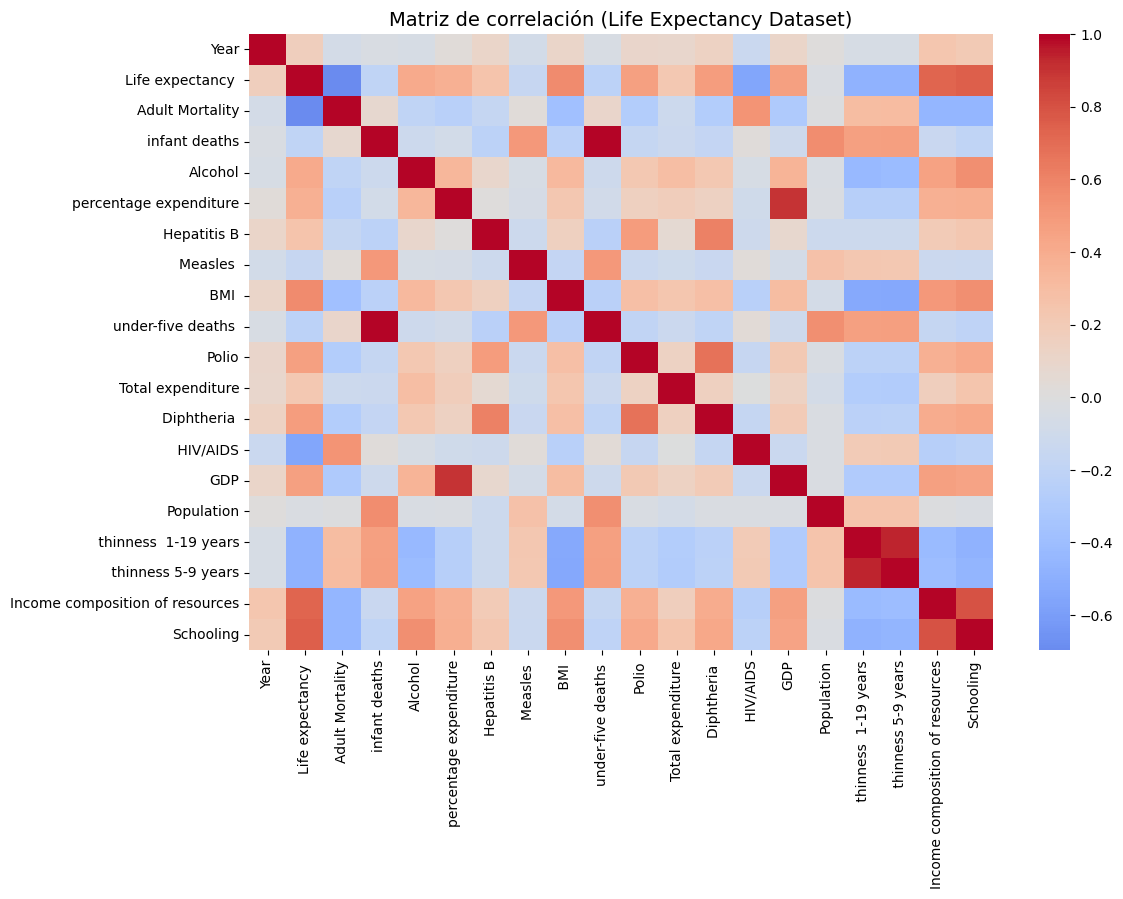

In [28]:
plt.figure(figsize=(12,8))
corr = df_raw.corr(numeric_only=True)

sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de correlación (Life Expectancy Dataset)", fontsize=14)
plt.show()




## Selección de variables para el modelo

A partir de la **matriz de correlación** con la variable objetivo `Life expectancy (años)`, se seleccionaron solo aquellas variables con mayor relación directa o indirecta con la esperanza de vida, evitando redundancias.  

### Variables seleccionadas
1. **Adult Mortality** → correlación negativa fuerte con la esperanza de vida.  
   - A mayor mortalidad adulta (15–60 años por cada 1000 hab.), menor es la esperanza de vida.  
   - Resume mejor que *infant deaths* y *under-five deaths*, que estaban altamente correlacionadas.

2. **HIV/AIDS** → correlación negativa moderada.  
   - Captura el impacto de epidemias en la población joven.  
   - Es un indicador de salud pública que no está cubierto por otras variables.

3. **BMI (Índice de Masa Corporal promedio, kg/m²)** → correlación positiva.  
   - Representa nutrición y bienestar general.  
   - Sustituye a las variables *thinness*, que son redundantes.

4. **Income composition of resources (índice 0–1)** → correlación positiva fuerte.  
   - Refleja el nivel de desarrollo humano y acceso a recursos.  
   - Integra aspectos económicos y sociales en una sola métrica.

5. **Schooling (años promedio de escolaridad)** → correlación positiva fuerte.  
   - Educación está fuertemente asociada con mayor esperanza de vida.  
   - Complementa a *income composition*, aportando un factor social directo.



### Normalizamos nombres de columnas
El CSV trae **espacios y mayúsculas** que pueden generar errores.  
Los pasamos a minúsculas, quitamos espacios al extremo y usamos `_` como separador.


In [9]:
df = df_raw.copy()
df.columns = df.columns.str.strip()

In [11]:
print("Filas x Columnas:", df.shape)


Filas x Columnas: (2938, 22)



## Preprocesamiento y selección de variables
- **Objetivo**: `life_expectancy` (años).  
- **Predictoras** (representativas y con buena intuición):  
  `adult_mortality`,`bmi`, `hiv_aids`, `schooling`, `Income composition of resources`

In [12]:

# Selección de variables

target = "Life expectancy"
features = ["Adult Mortality", "HIV/AIDS", "BMI",
            "Income composition of resources", "Schooling"]

df_sub = df[[target] + features].copy()

# Manejo de nulos:
# - Target: eliminar filas con nulos.
df_sub = df_sub.dropna(subset=[target])

# - Predictoras: imputar con la mediana
for c in features:
    df_sub[c] = df_sub[c].fillna(df_sub[c].median())


subconjunto de variables realmente útiles para predecir la esperanza de vida.


## Ajuste del **regresor lineal múltiple** y **métricas** (RMSE en **años**)
Dividimos en **entrenamiento** y **prueba** (80/20) y entrenamos un **LinearRegression**.

**RMSE** es la raíz del MSE y representa el error típico en **la misma unidad del objetivo**. Aquí, **años**.


In [13]:
# 3) Train/Test split
X = df_sub[features]
y = df_sub[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# 4) Ajuste del modelo (Regresión Lineal)

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)


LinearRegression()

In [15]:
import joblib

joblib.dump(modelo_regresion, "modelo_vida_lineal.pkl")
modelo_regresion = joblib.load("modelo_vida_lineal.pkl")


Intercepto: 54.9756


,Coeficiente,Abs_Coeficiente
Income composition of resources,7.896743,7.896743
Schooling,0.944387,0.944387
HIV/AIDS,-0.482790,0.482790
BMI,0.066708,0.066708
Adult Mortality,-0.023037,0.023037


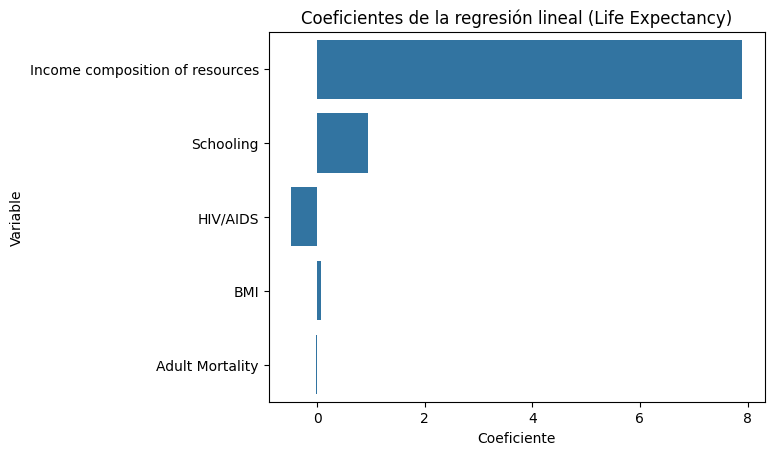


Ecuación del modelo:

y = -0.0230*Adult Mortality + -0.4828*HIV/AIDS + 0.0667*BMI + 7.8967*Income composition of resources + 0.9444*Schooling + 54.9756


In [18]:
# 5) Coeficientes e Intercepto
coeficientes = pd.Series(modelo_regresion.coef_, index=features, name="Coeficiente")
intercepto = modelo_regresion.intercept_

print("\nIntercepto:", round(intercepto, 4))
coef_df = coeficientes.to_frame()
coef_df["Abs_Coeficiente"] = coef_df["Coeficiente"].abs()
coef_df = coef_df.sort_values("Abs_Coeficiente", ascending=False)
display(coef_df)

# Gráfico de coeficientes
sns.barplot(x="Coeficiente", y=coef_df.index, data=coef_df, orient="h")
plt.title("Coeficientes de la regresión lineal (Life Expectancy)")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()

# Ecuación del modelo (hiperplano)
ecuacion = "y = " + " + ".join([f"{coeficientes[v]:.4f}*{v}" for v in features]) + f" + {intercepto:.4f}"
print("\nEcuación del modelo:\n")
print(ecuacion)

Intercepto ≈ 54.97: sería la “base” de años de vida sin ninguna contribución de las variables.

**Coeficiente positivo:** la variable aumenta la esperanza de vida.

**Coeficiente negativo:** la variable reduce la esperanza de vida.


Income composition of resources	+7.8967	Subir 1 punto en el índice de desarrollo humano (de 0 a 1) aumenta casi 8 años de esperanza de vida.

Schooling	+0.9444	Un año adicional de escolaridad promedio aumenta casi 1 año de vida.

HIV/AIDS	-0.4828	Si aumentan en 1 las muertes por VIH por cada 1000 nacidos vivos, la esperanza de vida baja medio año.

BMI	+0.0667	Cada punto extra en BMI promedio aumenta 0.07 años.

Adult Mortality	-0.0230	Cada 1 muerte extra por 1000 adultos (15–60 años) reduce la esperanza de vida en 0.02 años.


--- Métricas ---
MSE:  19.1724
RMSE (años): 4.3786
MAE  (años): 3.2152
R^2: 0.7784


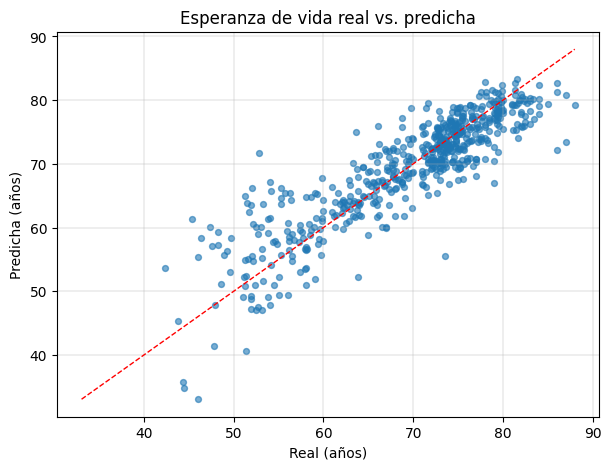

In [19]:
# 6) Métricas de evaluación

y_pred = modelo_regresion.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # EN AÑOS
mae  = mean_absolute_error(y_test, y_pred)  # EN AÑOS
r2   = r2_score(y_test, y_pred)

print("\n--- Métricas ---")
print(f"MSE:  {mse:.4f}")
print(f"RMSE (años): {rmse:.4f}")
print(f"MAE  (años): {mae:.4f}")
print(f"R^2: {r2:.4f}")

# Gráfico real vs. predicho (estilo ejemplo)
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6, s=18)
minv, maxv = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([minv, maxv], [minv, maxv], 'r--', linewidth=1)
plt.title("Esperanza de vida real vs. predicha")
plt.xlabel("Real (años)")
plt.ylabel("Predicha (años)")
plt.grid(True, linewidth=0.3)
plt.show()

MSE = 19.17 (años²): detecta mejor cuando el modelo se equivoca mucho en pocos casos.

Evaluamos el modelo con MSE, RMSE, MAE y R². El RMSE nos dice que el error típico de las predicciones es de 4.4 años, y el MAE que en promedio nos desviamos 3.2 años respecto a la realidad. El R² indica que casi el 78% de la variación en la esperanza de vida puede explicarse por nuestras cinco variables. En el gráfico real vs. predicho vemos que los puntos se alinean cerca de la diagonal, lo que significa que el modelo predice bastante bien, aunque no de manera perfecta.

In [20]:
# Predicción de un nuevo registro

# Valores para simular un país/año específico:
nuevo = pd.DataFrame({
    "Adult Mortality": [150],            # por 1000 (15–60 años)
    "HIV/AIDS": [1.2],                   # muertes por 1000 nacidos vivos (0–4 años)
    "BMI": [24.5],                       # kg/m²
    "Income composition of resources": [0.70],  # índice 0–1
    "Schooling": [12.5]                  # años
})

pred_nuevo = modelo_regresion.predict(nuevo)
print(f"\nPredicción (nuevo registro): {pred_nuevo[0]:.2f} años")


Predicción (nuevo registro): 69.91 años


In [21]:
# 9) Predicción desde Excel

# 9.1 Editar en Excel fuera de Colab
plantilla = pd.DataFrame({
    "Adult Mortality": [150],
    "HIV/AIDS": [1.2],
    "BMI": [24.5],
    "Income composition of resources": [0.70],
    "Schooling": [12.5]
})
plantilla.to_excel("nuevo_registro_vida.xlsx", index=False)
print("\nPlantilla creada: nuevo_registro_vida.xlsx  -> Descárgala, edítala en Excel y súbela de nuevo.")



Plantilla creada: nuevo_registro_vida.xlsx  -> Descárgala, edítala en Excel y súbela de nuevo.


In [30]:
# 9.2 Lee el Excel
#    Si el archivo tiene otro nombre, cámbialo en la variable 'ruta_excel'.
ruta_excel = "nuevo_registro_vida.xlsx"
nuevo_desde_excel = pd.read_excel(ruta_excel)

# Asegúrate de que las columnas del Excel coincidan EXACTAMENTE con 'features'
assert list(nuevo_desde_excel.columns) == features, \
    f"Las columnas del Excel deben ser {features}"

pred_excel = modelo_regresion.predict(nuevo_desde_excel)
print("Predicción para el registro en Excel (años):", np.round(pred_excel, 2))

Predicción para el registro en Excel (años): [69.91 51.07]


In [31]:
%pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 6.5 MB/s eta 0:00:00


In [35]:
# === Excel manual: coeficientes y cálculo visible, paso a paso ===
import pandas as pd
import xlsxwriter

# Confirma que tienes estas variables ya definidas:
# - modelo_regresion (entrenado)
# - features = ["Adult Mortality", "HIV/AIDS", "BMI",
#               "Income composition of resources", "Schooling"]
# - nuevo (con los valores de ejemplo que ya creaste)

# 1) Tomar coeficientes e intercepto
coefs = pd.Series(modelo_regresion.coef_, index=features)
intercepto = float(modelo_regresion.intercept_)

# 2) Crear el archivo Excel
excel_path = "prediccion_manual.xlsx"
wb = xlsxwriter.Workbook(excel_path)

# ===== Hoja 'modelo' =====
ws_m = wb.add_worksheet("modelo")
bold = wb.add_format({"bold": True})
num4 = wb.add_format({"num_format": "0.0000"})
num2 = wb.add_format({"num_format": "0.00"})

# Encabezados
ws_m.write(0, 0, "Variable", bold)
ws_m.write(0, 1, "Coeficiente", bold)

# Escribir coeficientes
for i, feat in enumerate(features, start=1):
    ws_m.write(i, 0, feat)
    ws_m.write_number(i, 1, float(coefs[feat]), num4)

# Intercepto
fila_interc = len(features) + 1  # fila (0-based) donde va el intercepto
ws_m.write(fila_interc, 0, "Intercepto", bold)
ws_m.write_number(fila_interc, 1, intercepto, num4)

# Ajustar ancho
ws_m.set_column(0, 0, 34)
ws_m.set_column(1, 1, 14)

# ===== Hoja 'prediccion' =====
ws_p = wb.add_worksheet("prediccion")

# Encabezados
ws_p.write(0, 0, "Variable", bold)
ws_p.write(0, 1, "Valor ingresado", bold)
ws_p.write(0, 2, "Coeficiente", bold)
ws_p.write(0, 3, "Multiplicación (valor × coef)", bold)

# Valores de ejemplo (los del DataFrame 'nuevo' que ya tienes)
valores_ejemplo = [float(nuevo[col].iloc[0]) for col in features]

# Escribir filas de variables
for i, (feat, val) in enumerate(zip(features, valores_ejemplo), start=1):
    # Columna A: nombre de la variable
    ws_p.write(i, 0, feat)
    # Columna B: valor ingresado (editable por el usuario)
    ws_p.write_number(i, 1, val, num2)
    # Columna C: coeficiente (referencia simple a hoja 'modelo')
    #   =modelo!B{fila_coef}
    ws_p.write_formula(i, 2, f"=modelo!B{i+1}", num4)
    # Columna D: multiplicación sencilla =B{fila}*C{fila}
    ws_p.write_formula(i, 3, f"=B{i+1}*C{i+1}", num4)

# Fila de Intercepto (sin valor ingresado)
fila_interc_pred = len(features) + 1  # 1-based en Excel, pero usamos 0-based aquí
excel_row_interc = fila_interc_pred + 1  # para la formula (1-based)
ws_p.write(fila_interc_pred, 0, "Intercepto", bold)
ws_p.write_blank(fila_interc_pred, 1, None)  # vacío
ws_p.write_formula(fila_interc_pred, 2, f"=modelo!B{len(features)+2}", num4)  # coef intercepto
ws_p.write_formula(fila_interc_pred, 3, f"=C{excel_row_interc}", num4)       # producto = intercepto

# Fila TOTAL (suma con + explícitos para que sea 100% transparente)
fila_total = fila_interc_pred + 1
ws_p.write(fila_total, 0, "TOTAL (Predicción años)", bold)

# Construimos una suma "manual" con + en lugar de SUMA
# D2 + D3 + ... + D{fila_interc_pred+1}
terminos = [f"D{r}" for r in range(2, excel_row_interc + 1)]
formula_total = "=" + "+".join(terminos)
ws_p.write_formula(fila_total, 3, formula_total, num2)

# Notas simples arriba
ws_p.write(0, 5, "Instrucciones:", bold)
ws_p.write(1, 5, "1) Edite la columna 'Valor ingresado' (columna B).")
ws_p.write(2, 5, "2) Los coeficientes vienen de la hoja 'modelo'.")
ws_p.write(3, 5, "3) La columna D muestra cada producto (valor × coef).")
ws_p.write(4, 5, "4) La última fila suma todos los productos (incluye el intercepto).")

# Ajustar ancho
ws_p.set_column(0, 0, 34)
ws_p.set_column(1, 1, 18)
ws_p.set_column(2, 3, 22)
ws_p.set_column(5, 5, 48)

wb.close()

print(f"Excel generado: {excel_path}\n"
      f"   - Hoja 'modelo': coeficientes e intercepto\n"
      f"   - Hoja 'prediccion': cálculo visible y manual (solo productos y sumas con '+')")



Excel generado: prediccion_manual.xlsx
   - Hoja 'modelo': coeficientes e intercepto
   - Hoja 'prediccion': cálculo visible y manual (solo productos y sumas con '+')


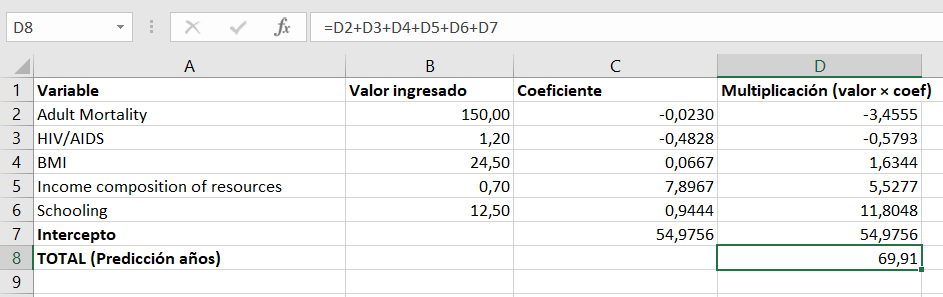


## Posibles mejoras

Añadir una variable de inmunización (por ejemplo, Diphtheria) si reduce el error.

si añadimos la vacunación, el modelo podría predecir con menos error, porque estamos considerando un factor de salud que influye directamente en la esperanza de vida.